In [1]:
import numpy as np
import matplotlib.pyplot as plt


from poppingw.utils import load_catalog

events = load_catalog('result/newest/events10000.h5')

In [2]:
Mz = events['Mc'].to_numpy()  # masses here are redshifted masses!
dL = events['dL'].to_numpy()
kappa = Mz**(5/6) / dL

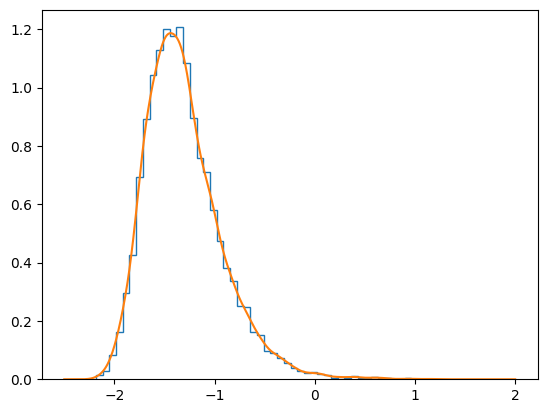

In [3]:
from scipy.stats import gaussian_kde

density = gaussian_kde(np.log(kappa))

plt.hist(np.log(kappa), bins=50, histtype='step', density=True)

x = np.linspace(-2.5, 2, 1000)
plt.plot(x, density(x))

In [4]:
from scipy.interpolate import InterpolatedUnivariateSpline

kappa_range = (-2.4, 1)
control = np.concatenate([np.linspace(kappa_range[0], -2, 5),
                          np.linspace(-2, -1.5, 4)[1:],
                          np.linspace(-1.5, 0, 5)[1:],
                          np.linspace(0, kappa_range[1], 4)[1:]])
print(f'use {len(control)} control points')
p_control = density(control)
p_control[[0, -1]] = 0

use 15 control points


(-2.4, 1.0)

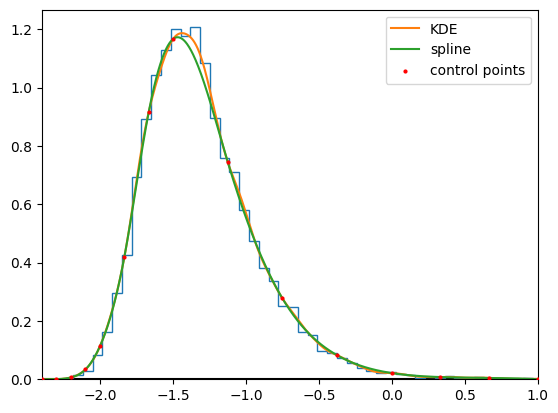

In [5]:
plt.hist(np.log(kappa), bins=50, histtype='step', density=True)
x = np.linspace(*kappa_range, 1000)
plt.plot(x, density(x), label='KDE')

interp = InterpolatedUnivariateSpline(control, p_control, ext='zeros')
plt.plot(x, interp(x), label='spline')

plt.scatter(control, p_control, color='r',
            label='control points', zorder=10, s=4)
plt.axhline(0, color='k', zorder=0)

plt.legend()
plt.xlim(*kappa_range)

In [6]:
np.savez('kappa_control.npz', control=control, p_control=p_control, range=[control[0], control[-1]])